## Matlab v Python : introduction

This is a very small piece of code that fits RBFs to some data

In this section

- matplotlib
- matlab-like functions like np.linspace


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generate noisy sine wave
x = np.linspace(0,10,100)
y = np.sin(3*x) + np.random.randn(x.size)*.5



We define our Radial basis functions as $\textrm{RBF}(x) = \exp\left[-\frac{(x-c)^2}{\sigma^2}\right]$ where $c$ is the centre and $\sigma$ the extent.  By having multiple such functions with different centres we can fit an arbitrary function.

In this section

- defining a function (two options)
- list comprehension
- power with double *
- numpy array from list
- transpose


In [ ]:
# Define RBF atom
# two options:
#   inline function definition (not available in matlab)
#   lambda : like @ in matlab

sig = 2 # extent of an atom
# option 1
# def rbf(x,c):
#     return np.exp(-(x-c)**2/sig**2)
# option 2
rbf = lambda x,c : np.exp(-(x-c)**2/sig**2)


# create a design matrix
# (using list comprehension to show off)
ci     = np.linspace(0,10,20)   # centres of the atoms
desmat = [rbf(x,c) for c in ci] # desmat contains a list of atoms

# from list to numpy array
desmat = np.asarray(desmat).T


Now we can fit to the sine wave with pseudoinverse. 

In this section:

- pinv
- basic plotting and prettifying
- saving figure to file

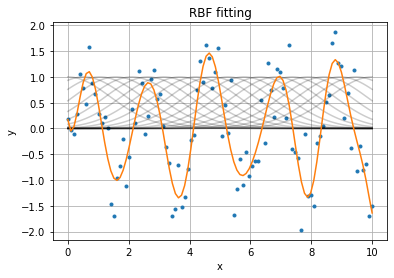

In [11]:

# invert model
beta   = np.linalg.pinv(desmat)@y.T

# plot data, RBFs, and fitted model
plt.figure()
plt.plot(x,y,'.')
plt.plot(x,desmat,'k',alpha=.2) 
plt.plot(x,desmat@beta)

# make it pretty
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('RBF fitting')
plt.savefig('/Users/saad/Desktop/RBF.pdf')

